In [35]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm,f_oneway, chi2_contingency,chi2
from statsmodels.stats.weightstats import DescrStatsW,CompareMeans
from statsmodels.stats.proportion import proportions_ztest

# Table of contents
- Central limit Theorem
- Compare means, (t-test,z-test)
- z proportion Test
- Anova

# Central limit Theorem
a sample > 30 will have than mean inside then standard deviation of the population

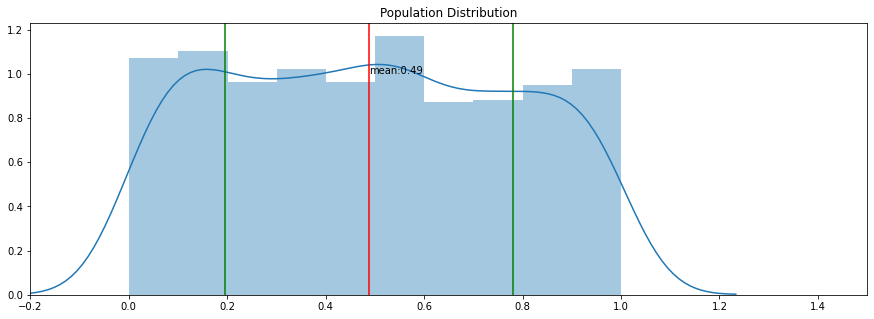

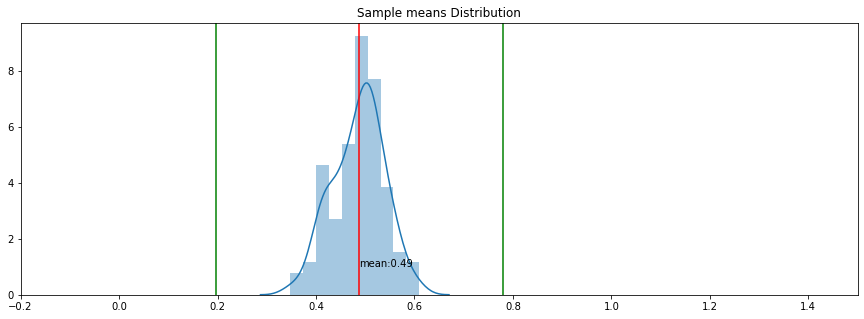

In [121]:
x = np.random.rand(1000)
import pandas as pd
y = [pd.Series(x).sample(30).mean() for _ in range(1,100)]
plt.figure(figsize=(15,5))
plt.xlim(-0.2,1.5)
plt.title("Population Distribution")
sns.distplot(x)
plt.text(x=x.mean(),y=1,s=f'mean:{round(x.mean(),2)}')
plt.axvline(x.mean(),color='r')
plt.axvline(x.mean()-x.std(),color='g')
plt.axvline(x.mean()+x.std(),color='g')
plt.show()

plt.figure(figsize=(15,5))
plt.xlim(-0.2,1.5)
plt.title("Sample means Distribution")
sns.distplot(y)
plt.axvline(x.mean(),color='r')
plt.text(x=x.mean(),y=1,s=f'mean:{round(x.mean(),2)}')
plt.axvline(x.mean()-x.std(),color='g')
plt.axvline(x.mean()+x.std(),color='g')
plt.show()

# Test-T
--- 
Compare means for 2 numeric samples

a != b, p-value 0.12805
a > b, p-value 0.93597
a < b, p-value 0.06403


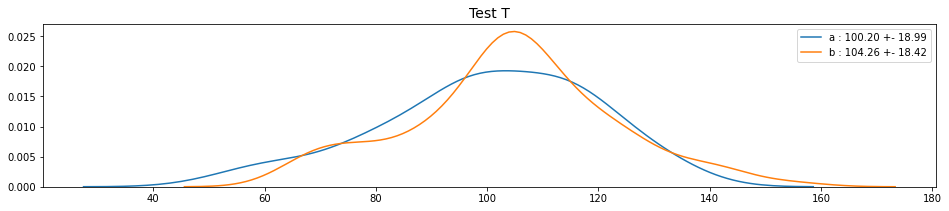

In [84]:
#np.random.seed(42)
plt.figure(figsize=(16, 3))
plt.title("Test T",fontsize=14)
a = np.random.normal(101, scale=20, size=(100,))
sns.distplot(a, hist=False, label='a : %.2f +- %.2f' % (a.mean(),a.std()))
a = DescrStatsW(a)


b = np.random.normal(103, scale=20, size=(100,))
sns.distplot(b, hist=False, label='b : %.2f +- %.2f' % (b.mean(),b.std()))
b = DescrStatsW(b)


print("a != b, p-value %.5f" % CompareMeans(a,b).ttest_ind()[1])
print("a > b, p-value %.5f" % CompareMeans(a,b).ttest_ind(alternative='larger')[1])
print("a < b, p-value %.5f" % CompareMeans(a,b).ttest_ind(alternative='smaller')[1])
plt.show()


# Z Proportion Test
Testing if proportions A - B = d, so you will be able to see if group A is different than group B, or if the proportion is higher or less

In [91]:
success = np.array([351,41])
population = np.array([605,195])

print(f"Group A: {success[0]}/{population[0]}")
print(f"Group B: {success[1]}/{population[1]}")
print((success/population).round(2))

# Test -----------------------

d = 0.2
z,pvalue = proportions_ztest(success,population,value=d)
print(f"Testing if proportions A - B = 20% ---\nzscore: {z}\np_value: {pvalue}")

z,pvalue = proportions_ztest(success,population)
print(f"Testing if proportions A - B = 0 ---\nzscore: {z}\np_value: {pvalue}")

Group A: 351/605
Group B: 41/195
[0.58 0.21]
Testing if proportions A - B = 20% ---
zscore: 4.127460692782178
p_value: 3.667911035111112e-05
Testing if proportions A - B = 0 ---
zscore: 8.985900954503084
p_value: 2.566230446480293e-19


# Anova
reaction time after drink the liquid, in seconds, tests if the variation outside groups against the inside one

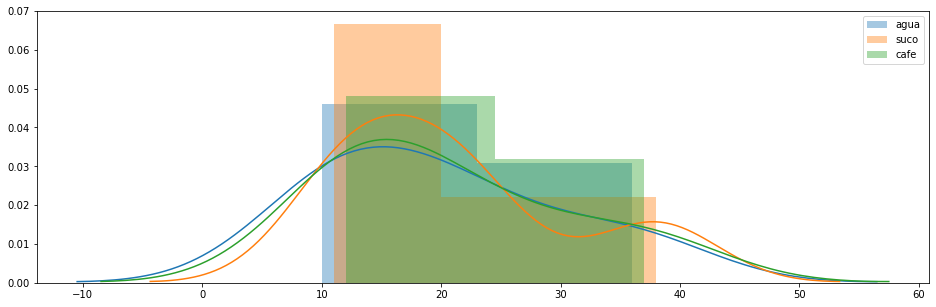

F_onewayResult(statistic=0.01273885350318471, pvalue=0.9873552754883261)

In [92]:
data = {
    "agua" : [10,12,18,24,36],
    "suco" : [11,14,19,23,38],
    "cafe" : [12,13,17,25,37],
}

plt.figure(figsize=(16,5))
for liquid in data.keys():
    sns.distplot(data[liquid],label=liquid)
plt.legend()
plt.show()

# Test -----------------------

f_oneway(data['agua'],data['cafe'],data['suco'])

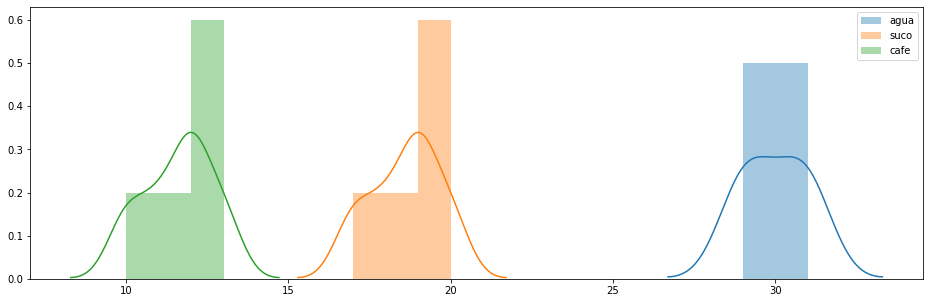

F_onewayResult(statistic=359.38888888889517, pvalue=1.9605389812469646e-11)

In [93]:
data = {
    "agua" : [29,29,30,31,31],
    "suco" : [17,18,19,19,20],
    "cafe" : [10,11,12,12,13],
}

plt.figure(figsize=(16,5))
for liquid in data.keys():
    sns.distplot(data[liquid],label=liquid)
plt.legend()
plt.show()

# Test -----------------------


f_oneway(data['agua'],data['cafe'],data['suco'])

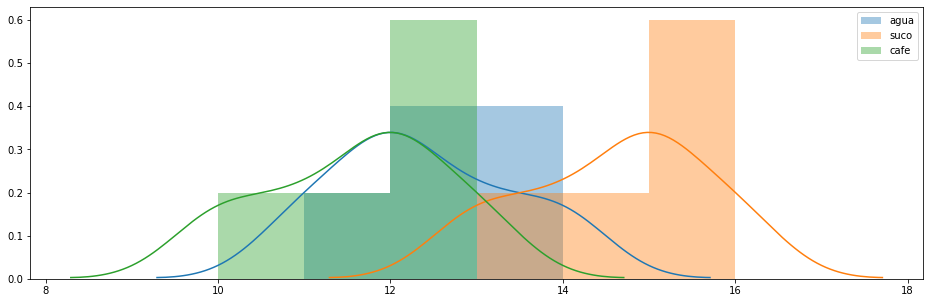

F_onewayResult(statistic=9.28205128205129, pvalue=0.003662836944962863)

In [123]:
data = {
    "agua" : [11,12,12,13,14],
    "suco" : [13,14,15,15,16],
    "cafe" : [10,11,12,12,13],
}

plt.figure(figsize=(16,5))
for liquid in data.keys():
    sns.distplot(data[liquid],label=liquid)
plt.legend()
plt.show()

# Test -----------------------

f_oneway(data['agua'],data['cafe'],data['suco'])

# Chi2
Looks for independency between variables, so here we can use to see if the proportions are different, the test will acuse if any of them are different, but not who

In [144]:
data = pd.DataFrame([
    [13,4],
    [102,53],
    [854,410]
],columns=['purchased','Nonpurchased'],index=['CNG','Diesel','Petrol'])

data['total'] = data.sum(axis=1)
data['prop'] = data['purchased']/data['total'].round(3)
data

,purchased,Nonpurchased,total,prop
CNG,13,4,17,0.764706
Diesel,102,53,155,0.658065
Petrol,854,410,1264,0.675633


In [146]:
chi2_contingency(data[['purchased','Nonpurchased']])

(0.8279898095768398,
 0.6610043192141939,
 2,
 array([[ 11.47144847,   5.52855153],
        [104.59261838,  50.40738162],
        [852.93593315, 411.06406685]]))

In [149]:
data = pd.DataFrame([
    [1,16],
    [0,155],
    [79,1185]
],columns=['purchased','Nonpurchased'],index=['CNG','Diesel','Petrol'])

data['total'] = data.sum(axis=1)
data['prop'] = data['purchased']/data['total'].round(3)
data

,purchased,Nonpurchased,total,prop
CNG,1,16,17,0.058824
Diesel,0,155,155,0.000000
Petrol,79,1185,1264,0.062500


In [150]:
chi2_contingency(data[['purchased','Nonpurchased']])

(10.255335220371334,
 0.005930376304755165,
 2,
 array([[9.47075209e-01, 1.60529248e+01],
        [8.63509749e+00, 1.46364903e+02],
        [7.04178273e+01, 1.19358217e+03]]))